# Early Detection of Parkinson’s Disease through Handwriting Analysis

##  Overview
This project focuses on the **early detection of Parkinson’s Disease (PD)** using handwriting patterns—specifically **spiral and meander drawings**—from the **NewHandPD dataset**. The goal is to develop a hybrid model that improves diagnostic accuracy through a combination of **deep learning** and **handcrafted features**.



##  Methodology

### 1. Data Preprocessing
- Images resized and normalized
- Grayscale conversion
- Label encoding (Healthy = 0, Parkinson = 1)
- Training and testing split (stratified)

### 2. Feature Extraction
- A **custom Convolutional Neural Network (CNN)** was trained to extract features from handwriting images.
- Features obtained from the penultimate layer were used as inputs to machine learning models.

### 3. Fractal Dimension Analysis
- Introduced **fractal dimension (FD)** as a handcrafted feature to capture the complexity of handwriting patterns.
- FD was calculated for each image and concatenated with CNN feature vectors to enhance discriminatory power.

### 4. Ensemble Learning
- Multiple machine learning models (e.g., Random Forest, XGBoost) were tested.
- An **ensemble approach** was used to improve classification performance by combining predictions.
- Compared CNN + ML with CNN + FD + ML to evaluate improvement.



## Results
- Adding **fractal dimension features** significantly improved classification metrics.
- The **hybrid model** (CNN + FD + Ensemble ML) outperformed baseline CNN + ML models.
- Metrics evaluated: Accuracy, Precision, Recall, and F1-Score.



## Novel Contributions
- Integration of **fractal geometry** in biomedical image analysis.
- Use of **hybrid learning (DL + ML + handcrafted features)** for early PD diagnosis.
- Ensemble learning for robust prediction.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
# Set dataset path
dataset_path = '/content/drive/My Drive/datasets/NewHandPD'

# Parameters
IMG_SIZE = 128  # or 224
CATEGORIES = ['Healthy', 'PD']  # Folder names

In [ ]:
# Step 1: Load images and apply preprocessing
def load_images(dataset_path, img_size, categories):
    data = []
    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Load image, convert to grayscale and resize
                img = Image.open(img_path).convert('L')  # Grayscale
                img = img.resize((img_size, img_size))
                img_array = np.array(img) / 255.0  # Normalize
                data.append((img_array, label)) #Label encoding (Healthy = 0, Parkinson = 1)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return data

In [ ]:
# Load the data
data = load_images(dataset_path, IMG_SIZE, CATEGORIES)

In [ ]:
# Step 2: Shuffle and separate features and labels
np.random.shuffle(data)
X, y = zip(*data)  #unzip
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add channel dimension
y = np.array(y)

In [ ]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Step 4: Print shapes and sample image
print(f"Training set shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels: {y_test.shape}")

Training set shape: (769, 128, 128, 1), Labels: (769,)
Test set shape: (193, 128, 128, 1), Labels: (193,)


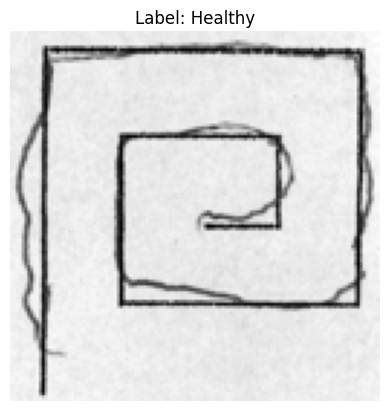

In [ ]:
# Display a sample image
plt.imshow(X_train[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Label: {'Healthy' if y_train[0]==0 else 'Parkinson'}")
plt.axis('off')
plt.show()

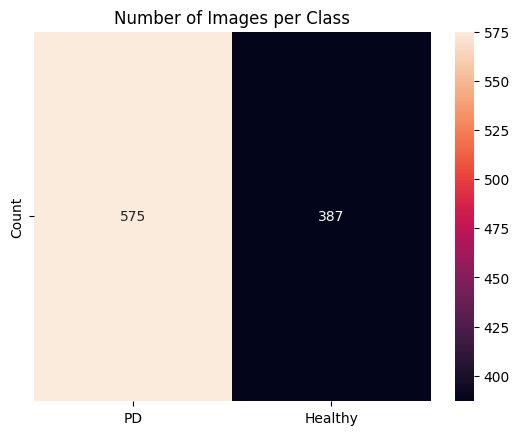

In [ ]:
#Average number of images per class

import os
import seaborn as sns
import matplotlib.pyplot as plt

# Count images per category
dataset_path = '/content/drive/My Drive/datasets/NewHandPD/'
CATEGORIES = os.listdir(dataset_path)

class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in CATEGORIES}

# Heatmap
sns.heatmap([list(class_counts.values())], annot=True, fmt="d", xticklabels=CATEGORIES, yticklabels=["Count"])
plt.title("Number of Images per Class")
plt.show()


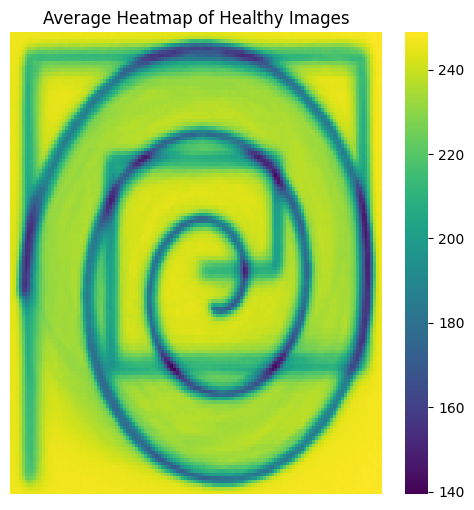

In [ ]:
#Heatmap of Healthy images

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

IMG_SIZE = 128  # or whatever your model uses
category_path = os.path.join(dataset_path, 'Healthy')  # example: use one class

avg_img = np.zeros((IMG_SIZE, IMG_SIZE))
count = 0

for img_name in os.listdir(category_path):
    img_path = os.path.join(category_path, img_name)
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        avg_img += img
        count += 1
    except:
        continue

avg_img /= count  # average pixel values

# Show heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(avg_img, cmap='viridis')
plt.title("Average Heatmap of Healthy Images")
plt.axis('off')
plt.show()


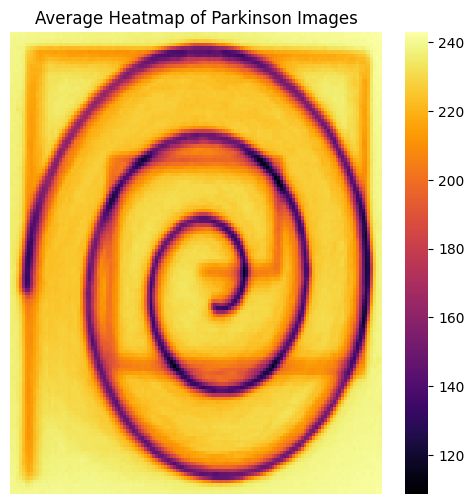

In [ ]:
#HeatMap of Parkinson's images

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

IMG_SIZE = 128  # or the size you're using
dataset_path = '/content/drive/My Drive/datasets/NewHandPD/'
category_path = os.path.join(dataset_path, 'PD')

avg_img_pd = np.zeros((IMG_SIZE, IMG_SIZE))
count = 0

for img_name in
os.listdir(category_path):
    img_path = os.path.join(category_path, img_name)
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        avg_img_pd += img
        count += 1
    except:
        continue

avg_img_pd /= count  # average pixel values

# Show heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(avg_img_pd, cmap='inferno')
plt.title("Average Heatmap of Parkinson Images")
plt.axis('off')
plt.show()


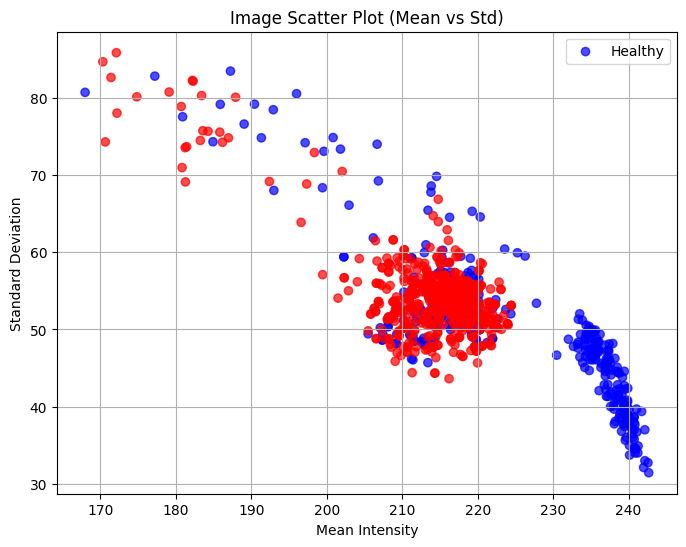

In [ ]:
#Scatter plot ofhealthy features vs parkinson features

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_features(img_folder, label, img_size):
    features = []
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            mean_intensity = np.mean(img)
            std_intensity = np.std(img)
            features.append((mean_intensity, std_intensity, label))
        except:
            continue
    return features

IMG_SIZE = 128
healthy_path = '/content/drive/My Drive/datasets/NewHandPD/Healthy'
parkinson_path = '/content/drive/My Drive/datasets/NewHandPD/PD'

healthy_features = extract_features(healthy_path, 'Healthy', IMG_SIZE)
parkinson_features = extract_features(parkinson_path, 'PD', IMG_SIZE)

# Combine and plot
all_features = healthy_features + parkinson_features
x = [f[0] for f in all_features]  # mean intensity
y = [f[1] for f in all_features]  # std deviation
labels = [f[2] for f in all_features]

# Scatter plot
colors = ['blue' if label == 'Healthy' else 'red' for label in labels]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, alpha=0.7, label=labels)
plt.xlabel('Mean Intensity')
plt.ylabel('Standard Deviation')
plt.title('Image Scatter Plot (Mean vs Std)')
plt.legend(['Healthy', 'Parkinson'])
plt.grid(True)
plt.show()


Extract features from CNN


A Convolutional Neural Network (CNN) is a deep learning architecture specially designed to process grid-like data, such as images. It mimics how the human brain detects visual patterns and spatial hierarchies.

Step-by-step working:

    Input Layer:
    The model takes a preprocessed grayscale image (e.g., 128×128×1) as input.

    Convolutional Layers:
    These layers apply multiple filters to the image to detect patterns like edges, textures, and shapes.
    Each filter learns to focus on a specific type of visual pattern.

    Max Pooling Layers:
    These reduce the size of the feature maps while keeping the most important information, which makes the model faster and more robust.

    Flatten + Dense Layers:
    After extracting features, the data is flattened into a 1D array and passed to fully connected layers that learn complex relationships and make a final prediction.

    Dropout Layer:
    Used to prevent overfitting by randomly disabling some neurons during training.

    Output Layer:
    A single neuron with a sigmoid activation function gives the probability of the positive class (e.g., presence or absence of a condition).

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a small CNN model
def build_custom_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Build the model
input_shape = (128, 128, 1)
cnn_model = build_custom_cnn(input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Call the model once with a sample input to build it before defining feature_extractor
_ = cnn_model.predict(X_train[:1])
print("Model built successfully after prediction on sample data.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
Model built successfully after prediction on sample data.


In [ ]:
from tensorflow.keras.models import Model

# Optional but recommended: print layer names
for layer in cnn_model.layers:
    print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense
dropout
dense_1


In [ ]:
# Replace 'conv2d_1' and 'dense_1' with your actual layer names if different
feature_extractor = Model(
    inputs=cnn_model.inputs,
    outputs=[
        cnn_model.get_layer('conv2d_1').output,  # last conv layer
        cnn_model.get_layer('dense_1').output    # last dense layer before output
    ]
)

In [ ]:
conv_features, dense_features = feature_extractor.predict(X_train)

print("Conv feature shape:", conv_features.shape)
print("Dense feature shape:", dense_features.shape)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


Conv feature shape: (769, 61, 61, 64)
Dense feature shape: (769, 1)


In [ ]:
feature_extractor = Model(
    inputs=cnn_model.inputs,
    outputs=cnn_model.get_layer('flatten').output
)

X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)
print("Flatten layer features:", X_train_features.shape)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
Flatten layer features: (769, 57600)


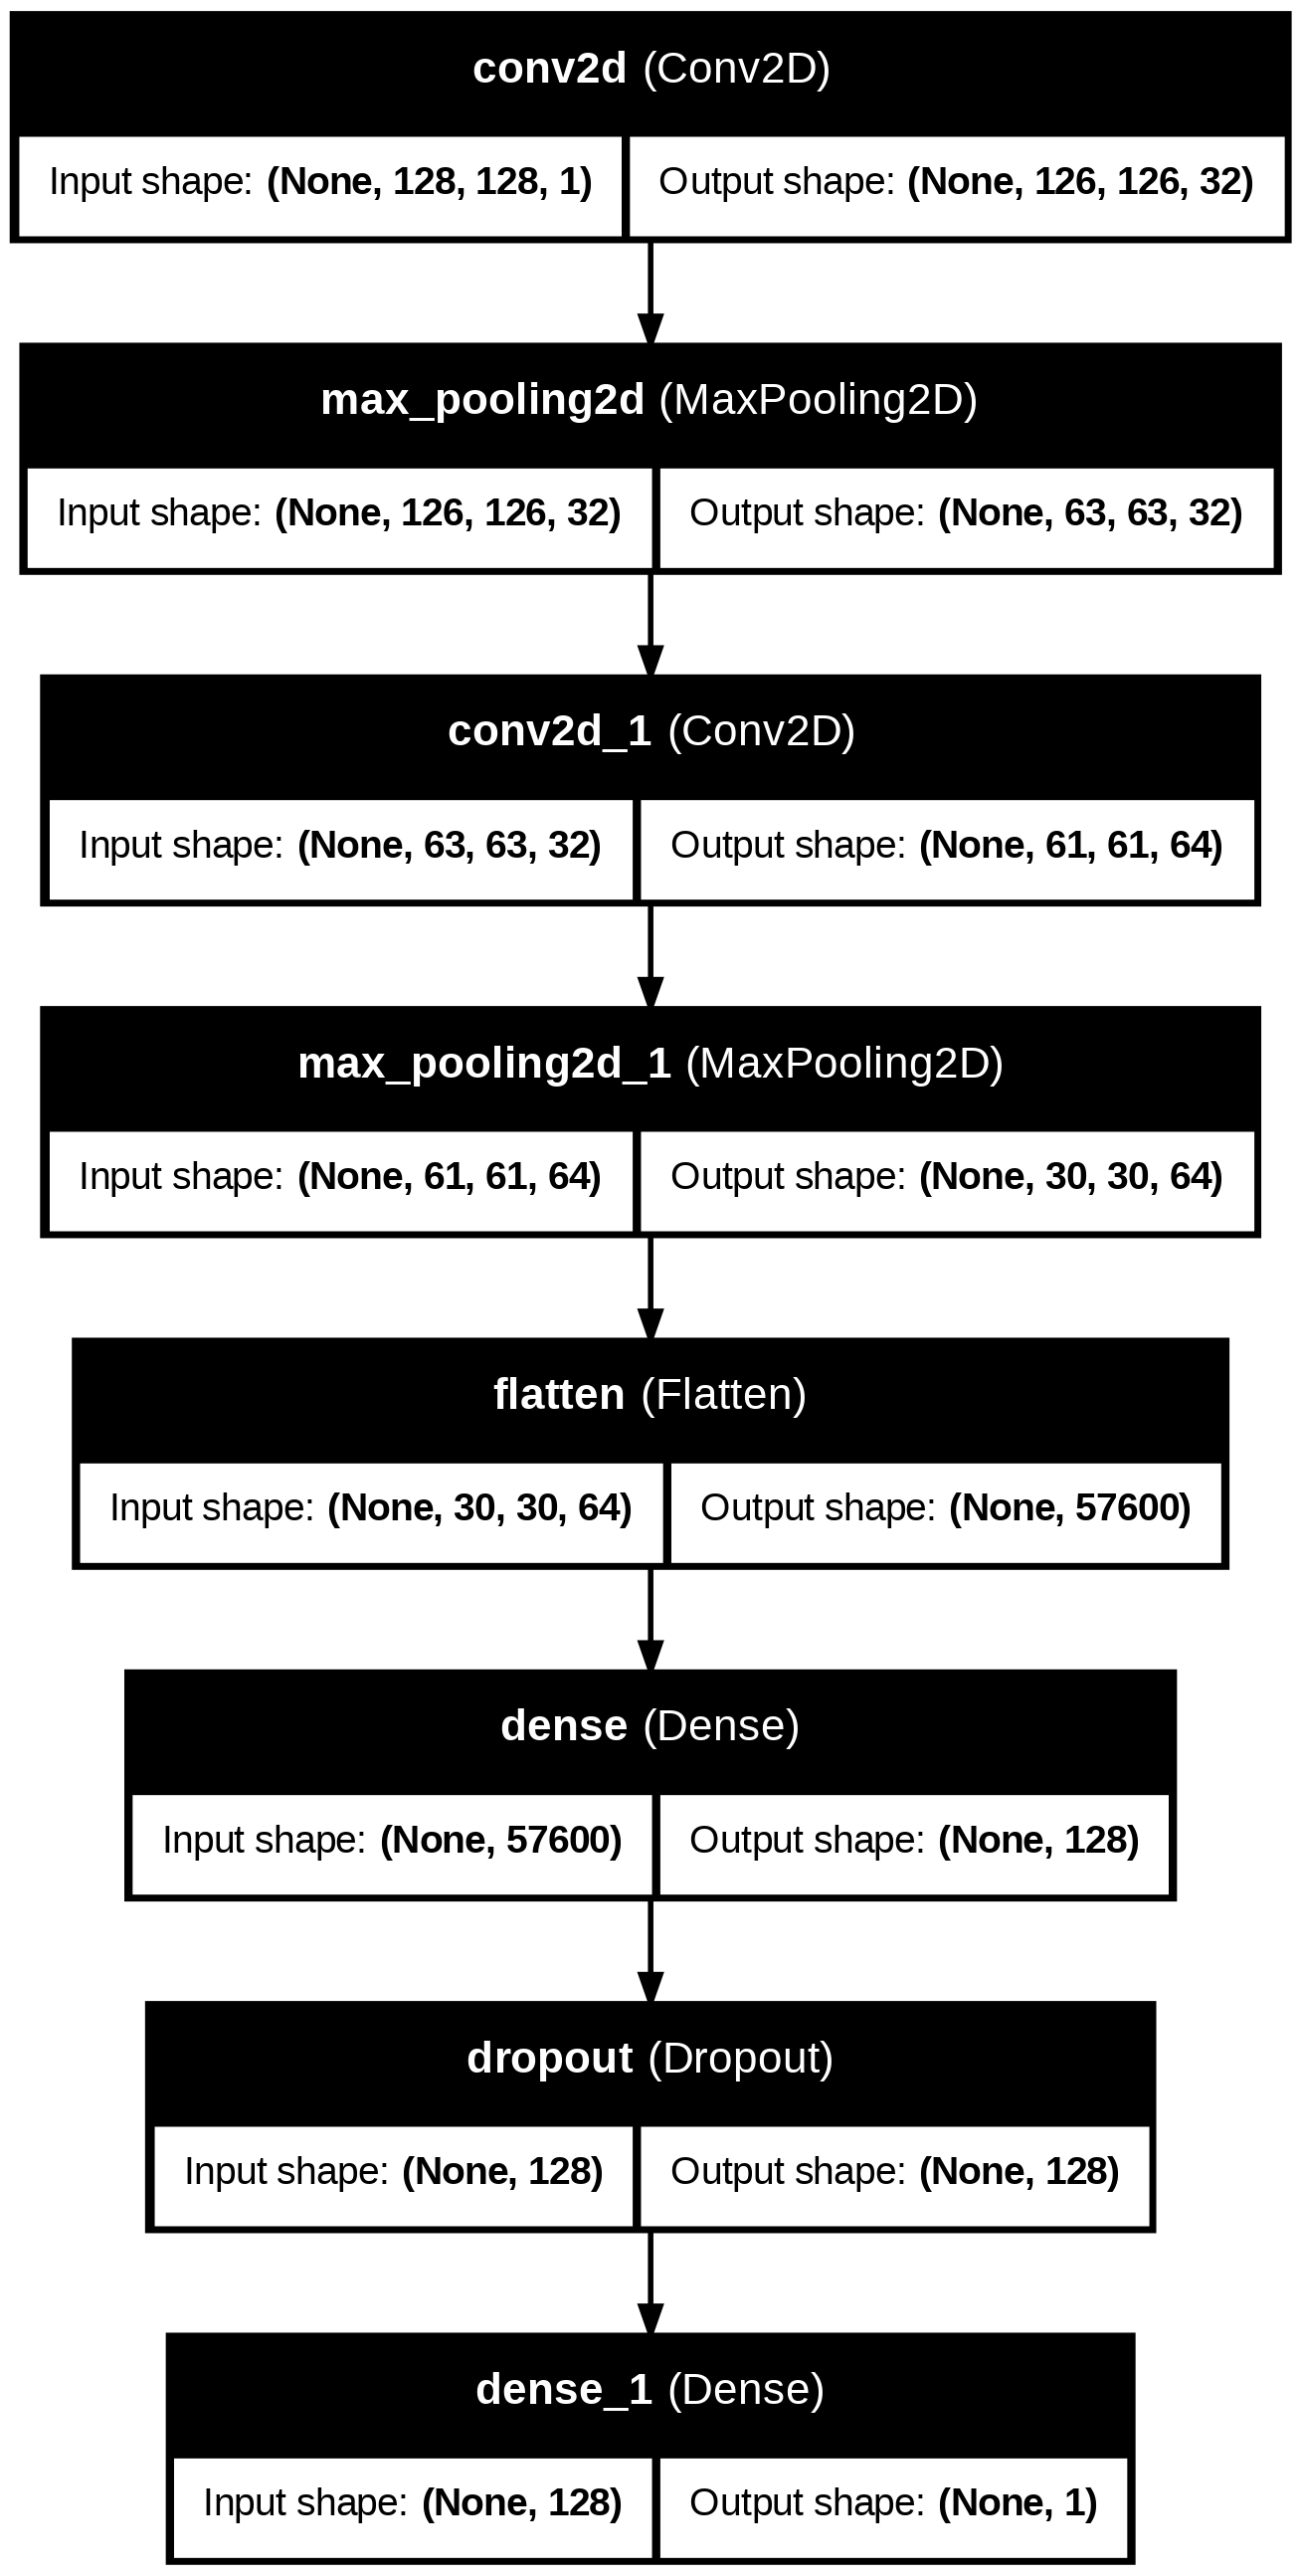

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model visualization to a file
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_feat_scaled = scaler.fit_transform(X_train_features)
X_test_feat_scaled = scaler.transform(X_test_features)



1. Deep Learning Features (from CNN)





Feature Type
Description




Low-level features
Edges, lines, curves (from initial layers)


Mid-level features
Texture, corners, stroke thickness


High-level patterns
Global shape of spirals/meanders, distortions, irregularities

Train ML Classifiers

In [ ]:
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

SVM Accuracy: 0.8704663212435233
Precision: 0.8260869565217391
Recall: 0.991304347826087
F1 Score: 0.9011857707509882

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81        78
           1       0.83      0.99      0.90       115

    accuracy                           0.87       193
   macro avg       0.90      0.84      0.86       193
weighted avg       0.89      0.87      0.87       193


Confusion Matrix:
 [[ 54  24]
 [  1 114]]


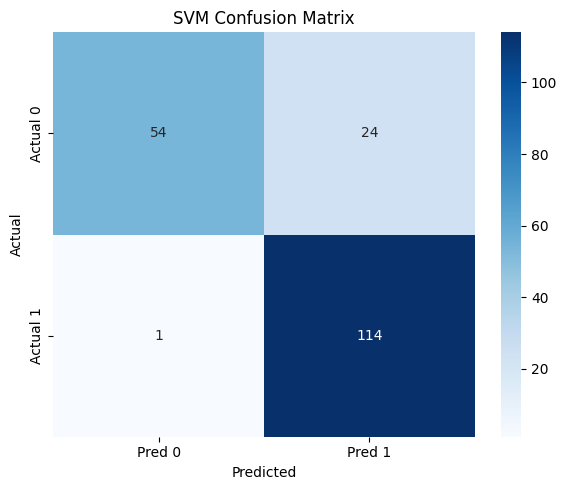

In [ ]:


# Train the SVM model
svm = SVC(probability=True, kernel='rbf', random_state=42)
svm.fit(X_train_feat_scaled, y_train)

# Predict on test data
svm_preds = svm.predict(X_test_feat_scaled)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

# Precision, Recall, F1-Score
print("Precision:", precision_score(y_test, svm_preds, average='binary'))  # Use 'macro' or 'weighted' for multi-class
print("Recall:", recall_score(y_test, svm_preds, average='binary'))
print("F1 Score:", f1_score(y_test, svm_preds, average='binary'))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, svm_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, svm_preds)
print("\nConfusion Matrix:\n", cm)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
#XGBoost

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_feat_scaled, y_train)

xgb_preds = xgb_model.predict(X_test_feat_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:08:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8808290155440415


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_feat_scaled, y_train)
rf_preds = rf.predict(X_test_feat_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.8808290155440415


In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_feat_scaled, y_train)
lr_preds = lr.predict(X_test_feat_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

Logistic Regression Accuracy: 0.8963730569948186


In [ ]:
# 2. Create a voting ensemble
from sklearn.ensemble import VotingClassifier

# Ensure the latest trained models are used
ensemble_model = VotingClassifier(
    estimators=[
        ('SVM', svm),  # Use the svm trained with probability=True
        ('rforest', rf),
        ('logreg', lr),
        ('xgb', xgb_model)
    ],
    voting='soft'  # soft voting considers predicted probabilities
)

In [ ]:
# Train the ensemble
ensemble_model.fit(X_train_feat_scaled, y_train)

# 4. Predict
ensemble_preds = ensemble_model.predict(X_test_feat_scaled)

# 5. Evaluate
print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_preds))
print("Classification Report:\n", classification_report(y_test, ensemble_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.9067357512953368
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        78
           1       0.91      0.94      0.92       115

    accuracy                           0.91       193
   macro avg       0.91      0.90      0.90       193
weighted avg       0.91      0.91      0.91       193



Fractal dimension analysis

What is Fractal Dimension?

    Fractal dimension is a mathematical measure that quantifies the complexity or roughness of a shape or structure in an image.

Working:

    Convert the image to grayscale, then to a binary image using a threshold.

    Divide the image into boxes of varying sizes (like 128×128, 64×64, etc.).

    For each box size, count how many boxes are needed to cover the white (active) parts of the image.

    Plot the counts vs box sizes on a log-log scale and compute the slope of the line.

    This slope gives the fractal dimension — a single number that tells how detailed or complex the pattern is.

In [ ]:
!pip install opencv-python numpy matplotlib scikit-image

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray

def fractal_dimension(image_path, threshold=0.9):
    image = imread(image_path)
    gray = rgb2gray(image)
    bw = gray < threshold  # Binary image

    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where(S > 0)[0])

    p = min(bw.shape)
    n = 2**np.floor(np.log2(p))
    sizes = 2**np.arange(int(np.log2(n)), 1, -1)

    counts = []
    for size in sizes:
        counts.append(boxcount(bw, int(size)))

    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

In [ ]:
import os
from sklearn.model_selection import train_test_split

image_paths = []
labels = []

root_dir = '/content/drive/My Drive/datasets/NewHandPD'
for label_name in ['Healthy', 'PD']:
    class_dir = os.path.join(root_dir, label_name)
    for fname in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, fname))
        labels.append(0 if label_name == 'Healthy' else 1)

train_image_paths, test_image_paths, y_train, y_test = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

In [ ]:
fd_train = [fractal_dimension(path) for path in train_image_paths]
fd_test = [fractal_dimension(path) for path in test_image_paths]

# Reshape for concatenation later
fd_train = np.array(fd_train).reshape(-1, 1)
fd_test = np.array(fd_test).reshape(-1, 1)

In [ ]:
# Combine CNN and fractal features
x_train_combined = np.concatenate((X_train_feat_scaled, fd_train), axis=1)
x_test_combined = np.concatenate((X_test_feat_scaled, fd_test), axis=1)

In [ ]:
#Random Forest
rf_f = RandomForestClassifier(random_state=42)
rf_f.fit(x_train_combined, y_train)

y_pred = rf_f.predict(x_test_combined)
print('accuracy : ', accuracy_score(y_test, y_pred))

accuracy :  0.8704663212435233


In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgb_f = XGBClassifier()
xgb_f.fit(x_train_combined, y_train)

y_pred_xgb = xgb_f.predict(x_test_combined)
print('accuracy : ', accuracy_score(y_test, y_pred_xgb))

accuracy :  0.9326424870466321


In [ ]:
#SVM
svm_f = SVC(probability=True, kernel='rbf', random_state=42)
svm_f.fit(x_train_combined, y_train)

# Predict on test data
svm_preds = svm_f.predict(x_test_combined)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

SVM Accuracy: 0.8704663212435233


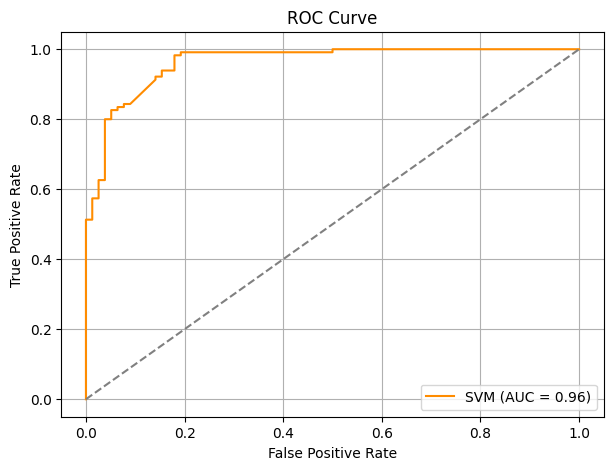

In [ ]:
#Receiver Operating Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for positive class
svm_f_probs = svm.predict_proba(X_test_feat_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, svm_f_probs)
auc_score = roc_auc_score(y_test, svm_f_probs)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label='SVM (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Logistic Regression
lr_f = LogisticRegression()
lr_f.fit(x_train_combined, y_train)
lr_preds = lr_f.predict(x_test_combined)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

Logistic Regression Accuracy: 0.8963730569948186


In [ ]:
#  Create a voting ensemble

# Ensure the latest trained models are used
ensemble_model_f = VotingClassifier(
    estimators=[
        ('SVM', svm_f),  # Use the svm trained with probability=True
        ('rforest', rf_f),
        ('logreg', lr_f),
        ('xgb', xgb_f)
    ],
    voting='soft'  # soft voting considers predicted probabilities
)

In [ ]:
# Train the ensemble
ensemble_model_f.fit(x_train_combined, y_train)

# 4. Predict
ensemble_preds_f = ensemble_model_f.predict(x_test_combined)

# 5. Evaluate
print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_preds_f))
print("Classification Report:\n", classification_report(y_test, ensemble_preds_f))

Ensemble Model Accuracy: 0.9430051813471503
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93        78
           1       0.93      0.98      0.95       115

    accuracy                           0.94       193
   macro avg       0.95      0.93      0.94       193
weighted avg       0.94      0.94      0.94       193



In [ ]:
#Comparison of both models
print("CNN + ML model ensemble ----------")
print("Accuracy:", accuracy_score(y_test, ensemble_preds))
print("Classification Report:\n", classification_report(y_test, ensemble_preds))

print("\n CNN + ML + fractal dimension model ensemble ----------")
print("Accuracy:", accuracy_score(y_test, ensemble_preds_f))
print("Classification Report:\n", classification_report(y_test, ensemble_preds_f))

CNN + ML model ensemble ----------
Accuracy: 0.9067357512953368
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        78
           1       0.91      0.94      0.92       115

    accuracy                           0.91       193
   macro avg       0.91      0.90      0.90       193
weighted avg       0.91      0.91      0.91       193


 CNN + ML + fractal dimension model ensemble ----------
Accuracy: 0.9430051813471503
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93        78
           1       0.93      0.98      0.95       115

    accuracy                           0.94       193
   macro avg       0.95      0.93      0.94       193
weighted avg       0.94      0.94      0.94       193



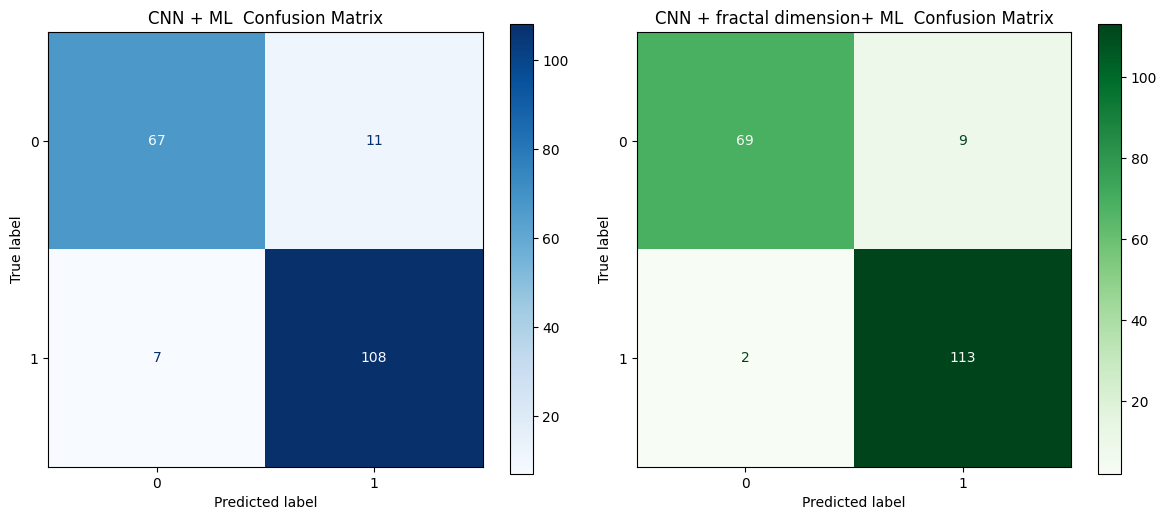

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate confusion matrices
cm1 = confusion_matrix(y_test, ensemble_preds)
cm2 = confusion_matrix(y_test, ensemble_preds_f)

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Model 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('CNN + ML  Confusion Matrix')

# Model 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('CNN + fractal dimension+ ML  Confusion Matrix')

# Adjust layout
plt.tight_layout()
plt.show()
